**Anggota Grup D:**

| No. | Nama| NPM|
|:---:|-----|:---:|
|1.| Achmad Rizki Baehaki | 2106725066 |
|2.| Faza Fahimatul `Ilmiyah | 2106638620 |
|3.| Najwa Salsabila Hakim | 2106726812 |
|4.| Rachel Thyffani Margaretha S | 2106726900 |
|5.| Wahyu Dimasdi Putra | 2106704736 |


# **Import Modul & Upload File**

In [ ]:
#Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
from io import StringIO
import string
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U -q PyDrive

In [ ]:
#Pengambilan file melalui drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
drive_id = '1_d0Q7mzkrhtYnLAixtFFi7ac3GaZSGLB'
files = drive.CreateFile({'id': drive_id})

# **Data Understanding**

In [ ]:
db = pd.read_csv(io.StringIO(files.GetContentString()))
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
cdb = db[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']]
cdb

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
cdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
cdb.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
cdb.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Shape dan Duplikasi Data**

In [ ]:
print('Shape dari Diabetes:', cdb.shape)
print('Duplikasi dari Diabetes:', cdb.duplicated().sum())

Shape dari Diabetes: (768, 9)
Duplikasi dari Diabetes: 0


# **Visualisasi Data Sebelum di Pre-processed**

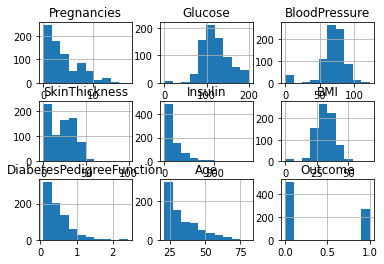

In [ ]:
viz = cdb[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']]
viz.hist()
plt.show()

# **Outlier**

In [ ]:
#Pengkategorian menjadi variabel numerik dan kategorik
cat_cols =cdb.select_dtypes(include = 'object')
num_cols =cdb.select_dtypes(include = np.number)
print('Numerical variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Numerical variables are :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


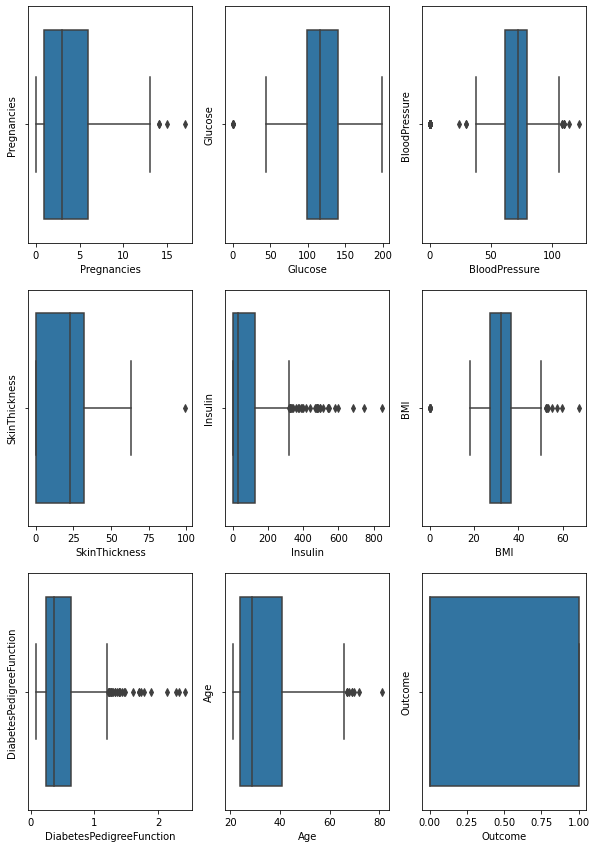

In [ ]:
#Membentuk visualisasi boxplot
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
  plt.subplot(4,3,i)
  sns.boxplot(cdb[col])
  plt.ylabel(col)
plt.show()

**Treatment Outlier**

In [ ]:
for x in ['Pregnancies']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['Glucose']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['BloodPressure']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['SkinThickness']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['Insulin']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['BMI']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['DiabetesPedigreeFunction']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

In [ ]:
for x in ['Age']:
  q75,q25 = np.percentile(cdb.loc[:,x],[75,25])
  intr_qr = q75-q25

  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)

  cdb.loc[cdb[x] < min,x] = np.nan
  cdb.loc[cdb[x] > max,x] = np.nan

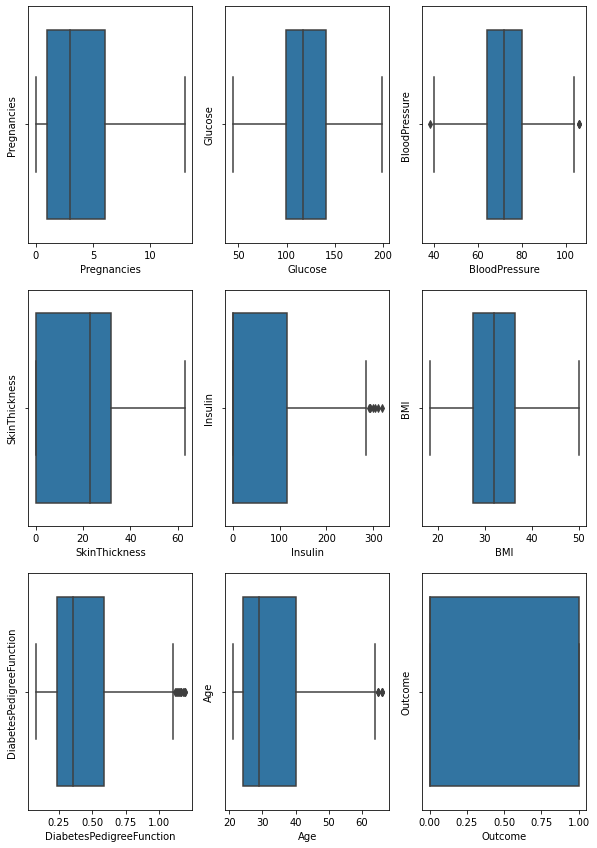

In [ ]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
  plt.subplot(4,3,i)
  sns.boxplot(cdb[col])
  plt.ylabel(col)
plt.show()

In [ ]:
print(cdb['BloodPressure'].quantile(0.25))
print(cdb['BloodPressure'].quantile(0.75))

64.0
80.0


In [ ]:
print(cdb['Insulin'].quantile(0.25))
print(cdb['Insulin'].quantile(0.75))

0.0
115.0


In [ ]:
print(cdb['DiabetesPedigreeFunction'].quantile(0.25))
print(cdb['DiabetesPedigreeFunction'].quantile(0.75))

0.238
0.587


In [ ]:
print(cdb['Age'].quantile(0.25))
print(cdb['Age'].quantile(0.75))

24.0
40.0


In [ ]:
cdb["BloodPressure"] = np.where(cdb["BloodPressure"] <64.0, 64.0,cdb['BloodPressure'])
cdb["BloodPressure"] = np.where(cdb["BloodPressure"] >80.0, 80.0,cdb['BloodPressure'])
print(cdb['BloodPressure'].skew())

-0.01669834799632041


In [ ]:
cdb["Insulin"] = np.where(cdb["Insulin"] <0.0, 0.0,cdb['Insulin'])
cdb["Insulin"] = np.where(cdb["Insulin"] >115.0, 115.0,cdb['Insulin'])
print(cdb['Insulin'].skew())

0.35926717223628246


In [ ]:
cdb["DiabetesPedigreeFunction"] = np.where(cdb["DiabetesPedigreeFunction"] <0.238, 0.238,cdb['DiabetesPedigreeFunction'])
cdb["DiabetesPedigreeFunction"] = np.where(cdb["DiabetesPedigreeFunction"] >0.587, 0.587,cdb['DiabetesPedigreeFunction'])
print(cdb['DiabetesPedigreeFunction'].skew())

0.25668047596066423


In [ ]:
cdb["Age"] = np.where(cdb["Age"] <24.0, 24.0,cdb['Age'])
cdb["Age"] = np.where(cdb["Age"] >40.0, 40.0,cdb['Age'])
print(cdb['Age'].skew())

0.30912738698551995


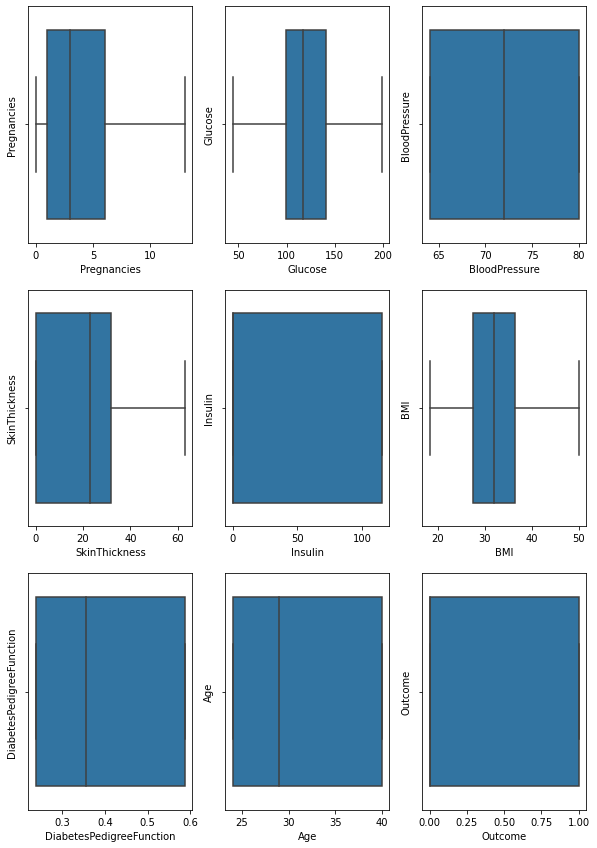

In [ ]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
  plt.subplot(4,3,i)
  sns.boxplot(cdb[col])
  plt.ylabel(col)
plt.show()

# **Noise**

Terdapat data bernilai 0 pada Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, dan Diabetes Pedigree Function yang mana tidak masuk akal dalam dunia nyata. Hal ini bisa dikarenakan adanya error atau pembacaan aktual yang tidak tersedia pada date tersebut.


In [ ]:
drop_0readings= list(cdb[cdb['Glucose'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

In [ ]:
drop_0readings= list(cdb[cdb['BloodPressure'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

In [ ]:
drop_0readings= list(cdb[cdb['SkinThickness'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

In [ ]:
drop_0readings= list(cdb[cdb['Insulin'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

In [ ]:
drop_0readings= list(cdb[cdb['BMI'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

In [ ]:
drop_0readings= list(cdb[cdb['DiabetesPedigreeFunction'] == 0.0].index)
cdb.drop(drop_0readings, axis = 0, inplace = True)

# **Missing Value**

In [ ]:
#Melihat missing values pada tiap variabel
total =cdb.isnull().sum()
print (total)

Pregnancies                  3
Glucose                      1
BloodPressure                5
SkinThickness                0
Insulin                     34
BMI                          7
DiabetesPedigreeFunction    18
Age                          1
Outcome                      0
dtype: int64


In [ ]:
#Pengubahan missing values menjadi median
cdb["Glucose"] = cdb["Glucose"].replace(np.NaN, cdb["Glucose"].median())
cdb["Pregnancies"] = cdb["Pregnancies"].replace(np.NaN, cdb["Pregnancies"].median())
cdb["BloodPressure"] = cdb["BloodPressure"].replace(np.NaN, cdb["BloodPressure"].median())
cdb["Insulin"] = cdb["Insulin"].replace(np.NaN, cdb["Insulin"].median())
cdb["BMI"] = cdb["Insulin"].replace(np.NaN, cdb["Insulin"].median())
cdb["DiabetesPedigreeFunction"] = cdb["DiabetesPedigreeFunction"].replace(np.NaN, cdb["DiabetesPedigreeFunction"].median())
cdb["Age"] = cdb["Age"].replace(np.NaN, cdb["Age"].median())

In [ ]:
print(cdb["Glucose"][:5])
print(cdb["Pregnancies"][:5])
print(cdb["BloodPressure"][:5])
print(cdb["Insulin"][:5])
print(cdb["BMI"][:5])
print(cdb["DiabetesPedigreeFunction"][:5])
print(cdb["Age"][:5])

3      89.0
4     137.0
6      78.0
8     197.0
13    189.0
Name: Glucose, dtype: float64
3     1.0
4     0.0
6     3.0
8     2.0
13    1.0
Name: Pregnancies, dtype: float64
3     66.0
4     64.0
6     64.0
8     70.0
13    64.0
Name: BloodPressure, dtype: float64
3      94.0
4     115.0
6      88.0
8     115.0
13    115.0
Name: Insulin, dtype: float64
3      94.0
4     115.0
6      88.0
8     115.0
13    115.0
Name: BMI, dtype: float64
3     0.2380
4     0.4305
6     0.2480
8     0.2380
13    0.3980
Name: DiabetesPedigreeFunction, dtype: float64
3     24.0
4     33.0
6     26.0
8     40.0
13    40.0
Name: Age, dtype: float64


In [ ]:
#Pengecekan Ulang
total =cdb.isnull().sum()
print (total)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Korelasi**

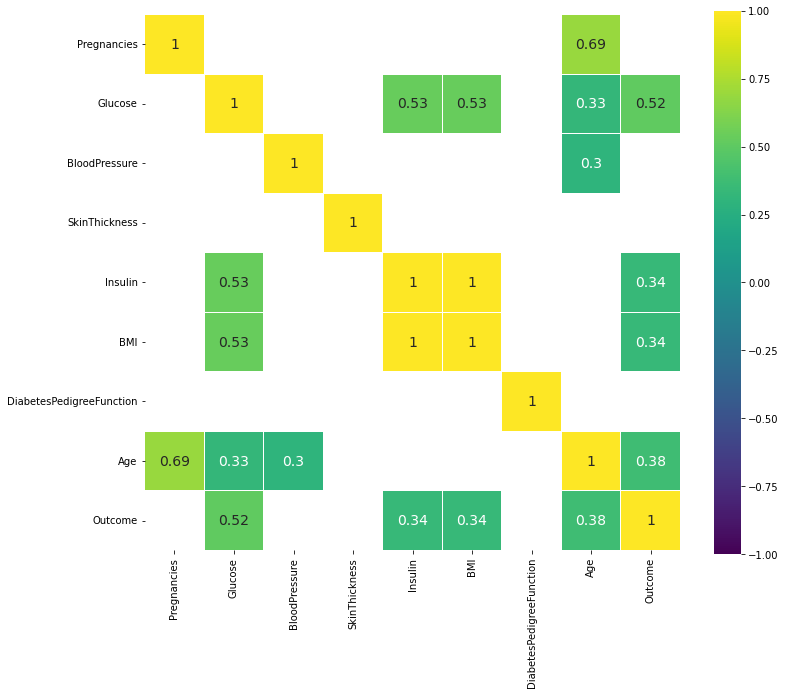

In [ ]:
corr = cdb.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

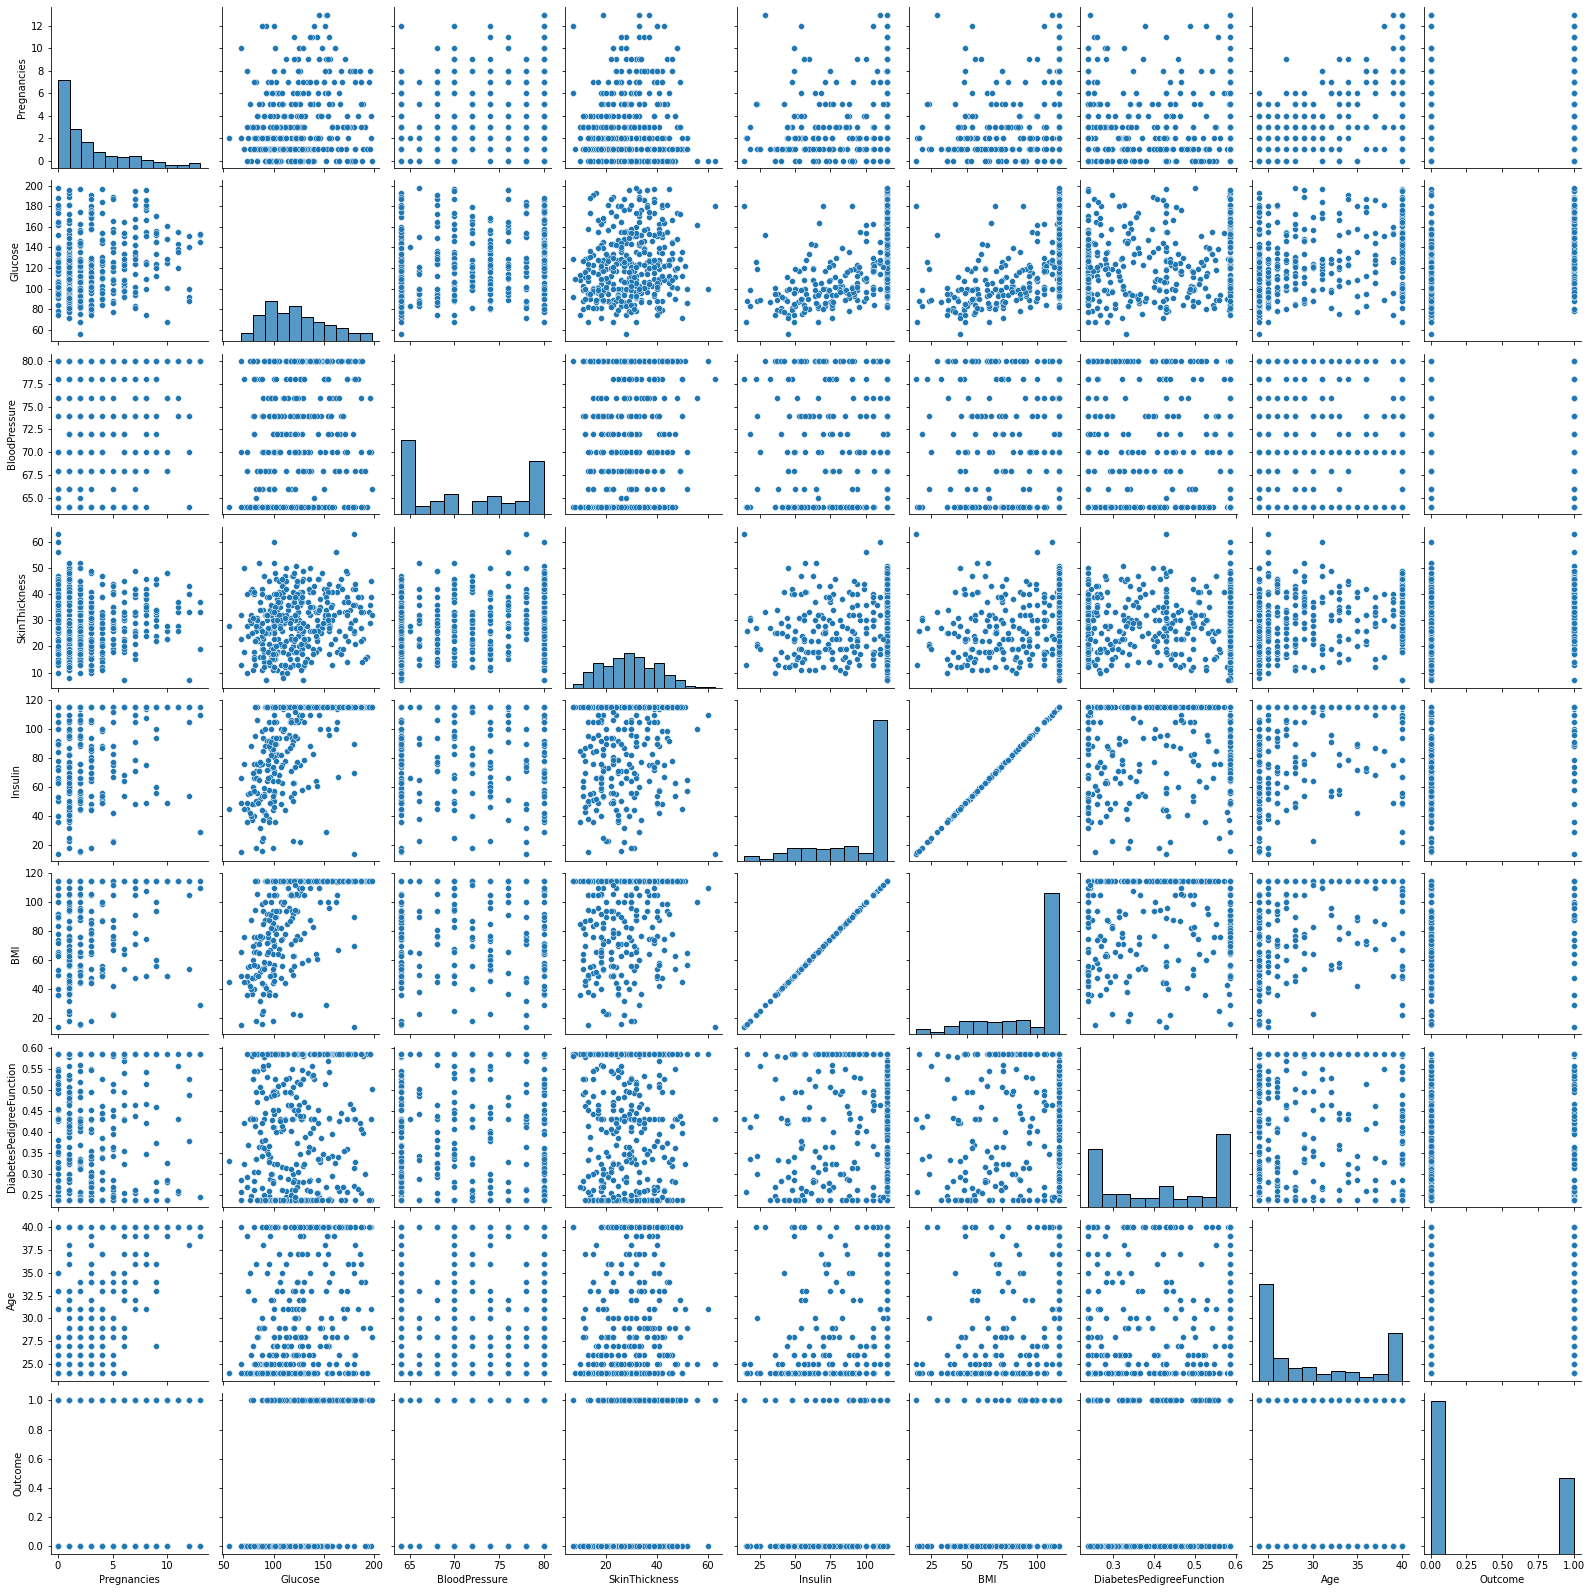

In [ ]:
sns.pairplot(cdb)

In [ ]:
cdb.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.196344,0.215483,0.088341,0.143382,0.143382,0.061668,0.688897,0.226340
Glucose,0.196344,1.000000,0.196705,0.199052,0.534002,0.534002,0.080860,0.328065,0.515509
BloodPressure,0.215483,0.196705,1.000000,0.258385,0.073973,0.073973,-0.042702,0.302502,0.179458
SkinThickness,0.088341,0.199052,0.258385,1.000000,0.189396,0.189396,0.041704,0.182440,0.257854
Insulin,0.143382,0.534002,0.073973,0.189396,1.000000,1.000000,0.106904,0.258754,0.338198
BMI,0.143382,0.534002,0.073973,0.189396,1.000000,1.000000,0.106904,0.258754,0.338198
DiabetesPedigreeFunction,0.061668,0.080860,-0.042702,0.041704,0.106904,0.106904,1.000000,0.087397,0.147700
Age,0.688897,0.328065,0.302502,0.182440,0.258754,0.258754,0.087397,1.000000,0.379348
Outcome,0.226340,0.515509,0.179458,0.257854,0.338198,0.338198,0.147700,0.379348,1.000000


In [ ]:
#download file hasil prepro
cdb.to_csv("diabetes preprocessing.csv", encoding ='utf8')